# Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

In [5]:

df = pd.read_csv('Website Analysis.csv')


# Filtering the Dataset

In [4]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [14]:
df.columns = df.iloc[0]
df = df.drop(index = 0).reset_index(drop = True)
df.columns = ["Channel Group","DateHour","Users","Sessions","Engaged Sessions","Average Engagement time per session","Engaged sessions per user","Events per session","Engagement rate","Event count"]

In [15]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
1,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
2,Organic Social,2024041721,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
3,Organic Social,2024050119,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
4,Direct,2024041622,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Channel Group                        3179 non-null   object
 1   DateHour                             3179 non-null   object
 2   Users                                3179 non-null   object
 3   Sessions                             3179 non-null   object
 4   Engaged Sessions                     3179 non-null   object
 5   Average Engagement time per session  3179 non-null   object
 6   Engaged sessions per user            3179 non-null   object
 7   Events per session                   3179 non-null   object
 8   Engagement rate                      3179 non-null   object
 9   Event count                          3179 non-null   object
dtypes: object(10)
memory usage: 248.5+ KB


In [20]:
df["DateHour"] = pd.to_datetime(df["DateHour"],format = "%Y%m%d%H",errors = 'coerce')
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.31553398058250,0.64375,4.694174757281550,0.5,967
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.31506849315070,0.6875,4.63013698630137,0.502283105022831,1014
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833333333300,0.5949367088607590,4.057291666666670,0.4895833333333330,779


In [21]:
numeric_cols = df.columns.drop(["Channel Group","DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric,errors = 'coerce')
df["Hour"] = df["DateHour"].dt.hour

In [22]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Channel Group                        3179 non-null   object        
 1   DateHour                             3179 non-null   datetime64[ns]
 2   Users                                3179 non-null   int64         
 3   Sessions                             3179 non-null   int64         
 4   Engaged Sessions                     3179 non-null   int64         
 5   Average Engagement time per session  3179 non-null   float64       
 6   Engaged sessions per user            3179 non-null   float64       
 7   Events per session                   3179 non-null   float64       
 8   Engagement rate                      3179 non-null   float64       
 9   Event count                          3179 non-null   int64         
 10  Hour        

In [24]:
df.describe()

,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3179,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000,3179.000000
mean,2024-04-20 01:20:29.820698368,41.776345,50.989305,28.229317,66.669863,0.606439,4.676117,0.503410,241.363007,11.797735
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:00:00,20.000000,24.000000,13.000000,32.091250,0.561404,3.750000,0.442857,103.000000,6.000000
50%,2024-04-20 03:00:00,42.000000,51.000000,27.000000,49.096154,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.518519,0.750000,5.218981,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,187.000000,256.000000,125.000000,4525.000000,2.000000,56.000000,1.000000,1117.000000,23.000000
std,NaN,29.129828,36.328970,20.417710,127.257871,0.264147,2.796538,0.228313,182.081506,6.883023


In [25]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


# Data Visualization Insights

# Sessions and User over time

In [26]:
sns.set(style = "whitegrid")

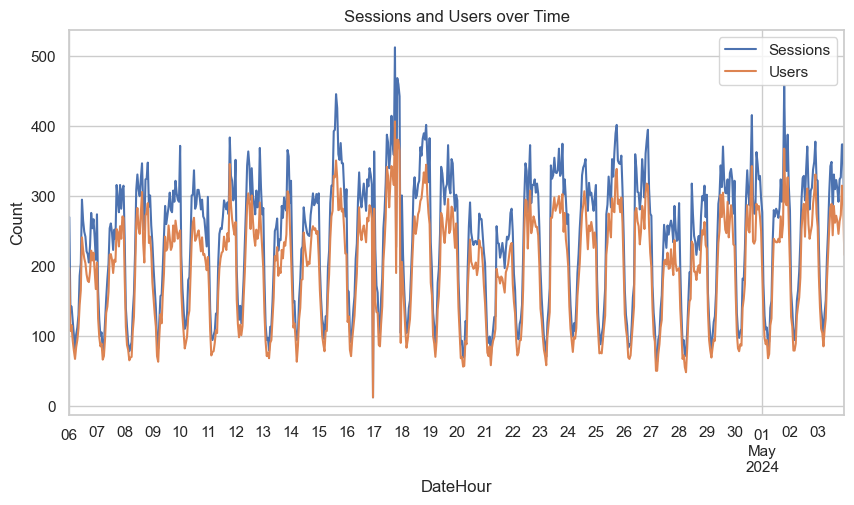

In [30]:
plt.figure(figsize = (10,5))
df.groupby("DateHour")[["Sessions","Users"]].sum().plot(ax= plt.gca())
plt.title("Sessions and Users over Time")
plt.xlabel("DateHour")
plt.ylabel("Count")
plt.show()

# Total Users by Channel

C:\Users\asus\AppData\Local\Temp\ipykernel_16216\1440116272.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df,x = "Channel Group",y = "Users",estimator = np.sum,palette= 'viridis')


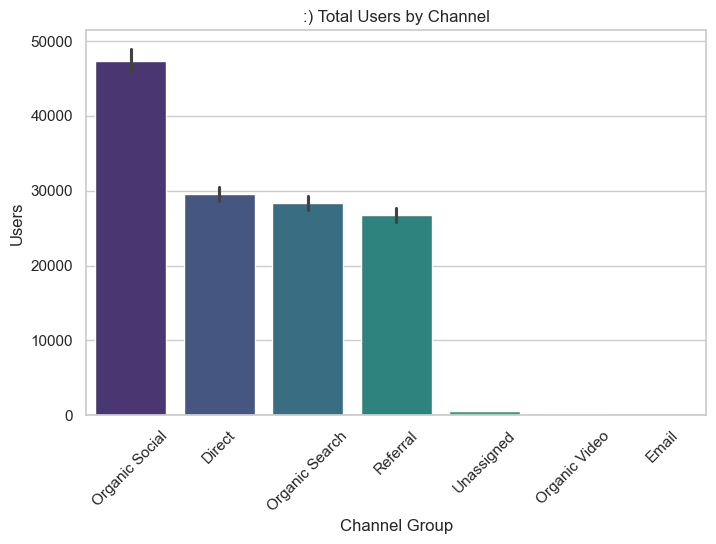

In [34]:

plt.figure(figsize= (8,5))
sns.barplot(data = df,x = "Channel Group",y = "Users",estimator = np.sum,palette= 'viridis')
plt.title(":) Total Users by Channel")
plt.xticks(rotation = 45)
plt.show()

In [36]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


# Average Engagement Time by Channel

C:\Users\asus\AppData\Local\Temp\ipykernel_16216\605548268.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = "Channel Group",y = "Average Engagement time per session", estimator = np.mean,palette= 'magma')


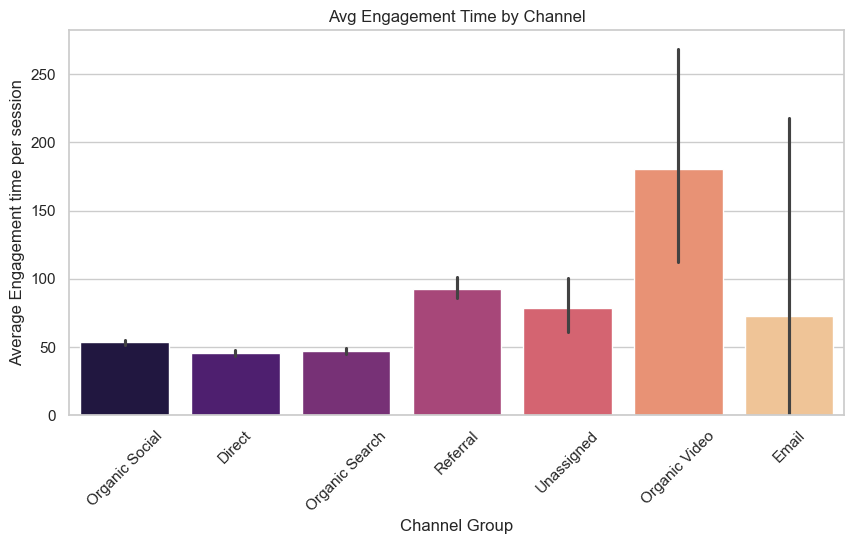

In [39]:
plt.figure(figsize= (10,5))
sns.barplot(data = df, x = "Channel Group",y = "Average Engagement time per session", estimator = np.mean,palette= 'magma')
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation = 45)
plt.show()

# Engagement Rate Distribution by Channel

C:\Users\asus\AppData\Local\Temp\ipykernel_16216\3902402432.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x= "Channel Group", y= "Engagement rate", palette = "coolwarm")


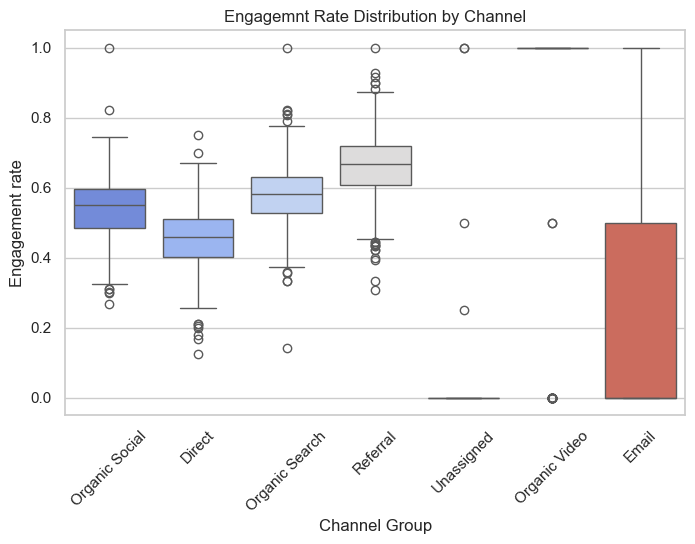

In [44]:
plt.figure(figsize=(8,5))
sns.boxplot(data = df, x= "Channel Group", y= "Engagement rate", palette = "coolwarm")
plt.title("Engagemnt Rate Distribution by Channel")
plt.xticks(rotation = 45)
plt.show()

# Engaged vs Non-Engaged Session

In [45]:
df.head()

,Channel Group,DateHour,Users,Sessions,Engaged Sessions,Average Engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
1,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20
2,Organic Social,2024-04-17 21:00:00,160,206,103,59.315534,0.643750,4.694175,0.500000,967,21
3,Organic Social,2024-05-01 19:00:00,160,219,110,40.315068,0.687500,4.630137,0.502283,1014,19
4,Direct,2024-04-16 22:00:00,158,192,94,39.020833,0.594937,4.057292,0.489583,779,22


In [47]:
session_df = df.groupby("Channel Group")[["Sessions","Engaged Sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged Sessions"]
session_df_melted = session_df.melt(id_vars = "Channel Group",value_vars =["Engaged Sessions","Non-Engaged"])



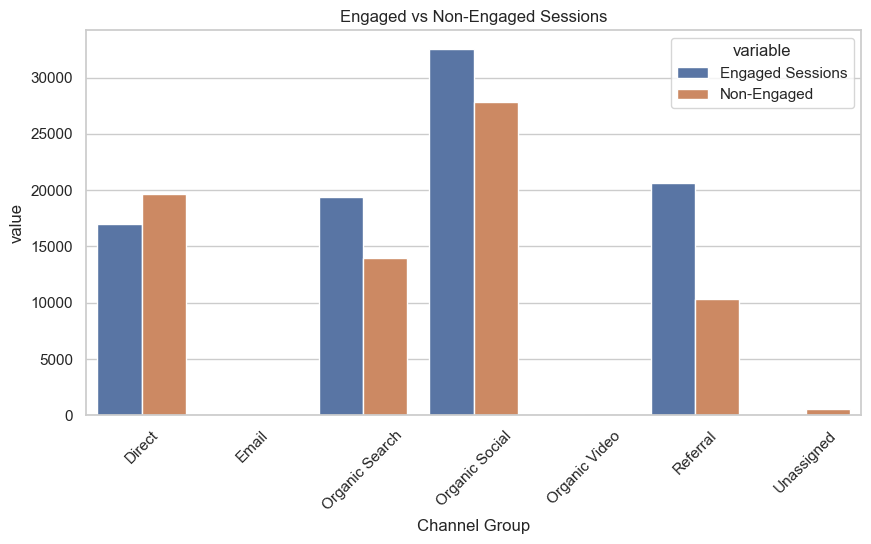

In [50]:
plt.figure(figsize= (10,5))
sns.barplot(data = session_df_melted,x = "Channel Group",y = "value",hue= "variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation = 45)
plt.show()

# Traffic by Hour Channel

In [51]:
heatmap_data = df.groupby(["Hour","Channel Group"])["Sessions"].sum().unstack().fillna(0)

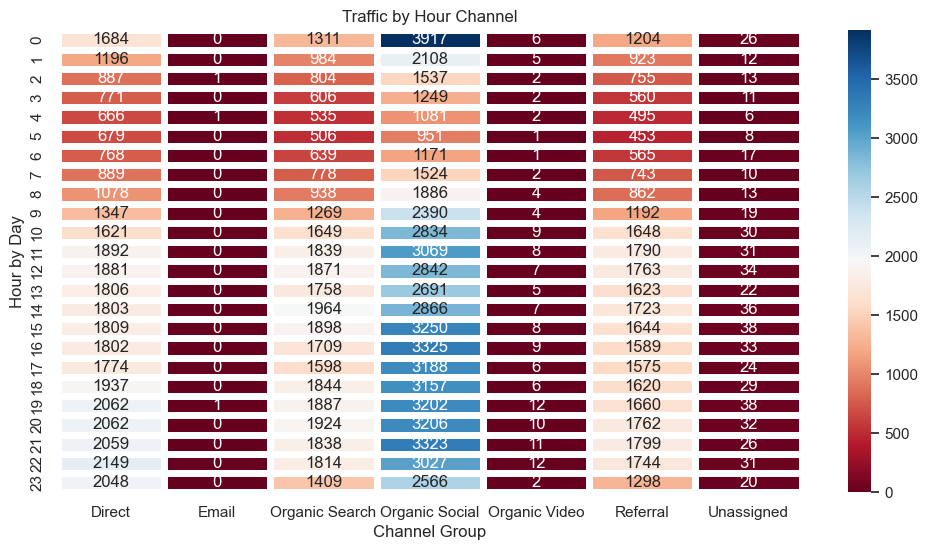

In [56]:
plt.figure(figsize= (12,6))
sns.heatmap(heatmap_data,cmap = "RdBu",linewidths=5, annot = True,fmt= ".0f")
plt.title("Traffic by Hour Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour by Day")
plt.show()

# Engagement Rate vs Session Rate

In [59]:
df_plot = df.groupby("DateHour")[["Engagement rate","Sessions"]].mean().reset_index()

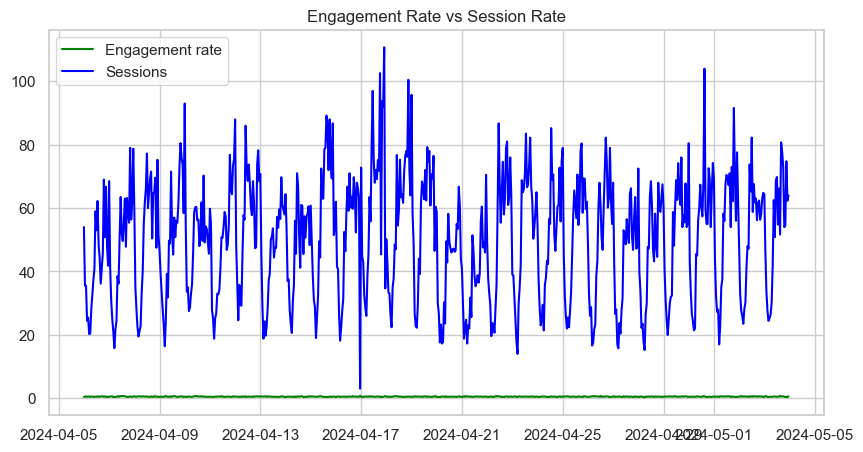

In [67]:
plt.figure(figsize= (10,5))
plt.plot(df_plot["DateHour"],df_plot["Engagement rate"],label = "Engagement rate", color = "green")
plt.plot(df_plot["DateHour"],df_plot["Sessions"],label = "Sessions",color = "blue")
plt.title("Engagement Rate vs Session Rate")
plt.legend()
plt.grid(True)
plt.show()